In [1]:
# import the packages that will be used for the assignment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import calendar

In [2]:
# read in the data
df = pd.read_csv("2015_trip_data.csv")

In [3]:
# add variables for start/stop dates and days of the week (4 additional columns)
starttime = pd.DatetimeIndex(df['starttime'])
stoptime = pd.DatetimeIndex(df['stoptime'])
df['startweekday'] = starttime.dayofweek
df['startdate'] = starttime.date
df['stopweekday'] = stoptime.dayofweek
df['stopdate'] = stoptime.date

In [4]:
# get the total counts per station, per day of the week (from/to)
groupby_day_from = df.groupby(['from_station_id', 'startweekday']).size()
groupby_day_to = df.groupby(['to_station_id', 'stopweekday']).size()

# get the number of occurrences of each day of the week (from/to)
num_days_from = df.groupby(['startweekday'])['startdate'].nunique()
num_days_to = df.groupby(['stopweekday'])['stopdate'].nunique()

# calculate the averages per day of the week for each station (from/to)
avg_station_weekday_from = groupby_day_from / num_days_from
avg_station_weekday_to = groupby_day_to / num_days_to

# find the 'differences' between from (-) and to (+) per day of the week for each station
avg_diff_from_to = avg_station_weekday_to.unstack() - avg_station_weekday_from.unstack()

In [5]:
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)
    rects1 = plt.bar(index, df[column])
    if 'xlabel' in opts:
        plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
        plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
        plt.xticks(index, df.index)
        _, labels = plt.xticks()
        plt.setp(labels, rotation=90)
    else:
        labels = ['' for x in df.index]
        plt.xticks(index, labels)   
    if 'ylim' in opts:
        plt.ylim(opts['ylim'])
    if 'title' in opts:
        plt.title(opts['title'])
    else:
        plt.title(calendar.day_name[column])

In [6]:
def plot_bar(df, columns, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param list-of-str columns: names of the column to plot
    :param dict opts: key is plot attribute
    """
    num_columns = len(columns)
    local_opts = dict(opts)
    idx = 0
    for column in columns:
        idx += 1
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        if idx == num_columns:
            local_opts['xticks'] = True
            local_opts['xlabel'] = opts['xlabel']
        plt.subplot(num_columns, 1, idx)
        plot_bar1(df, column, local_opts)

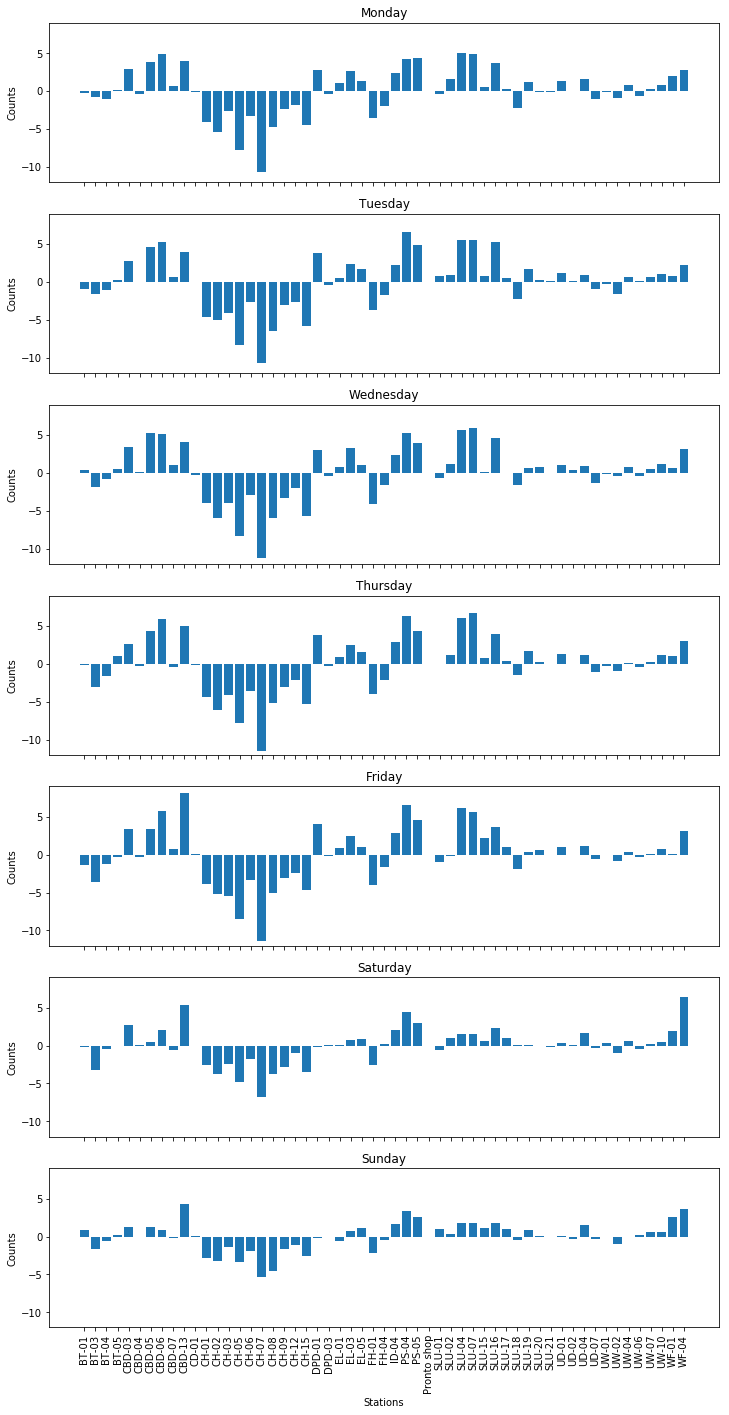

In [7]:
# adjust figure size, take the ops input variables, and plot the data
fig = plt.figure(figsize=(12, 24))
opts = {'xlabel': 'Stations', 'ylabel': 'Counts', 'ylim': [round(avg_diff_from_to.min() - 1).min(), round(avg_diff_from_to.max() + 1).max()]}
plot_bar(avg_diff_from_to, [0, 1, 2, 3, 4, 5, 6], opts)